The current version of `SpinPlots` only works with processed Bruker data. If you’re dealing with unprocessed data or using data from a different brand, we recommend using [NMRglue](https://www.nmrglue.com/) instead. Also, if you want more control over the looks of your plot, `SpinPlots` might feel a bit limited since it mostly sticks to the default matplotlib style for now.

In [1]:
from spinplots.plot import bruker1d, bruker1d_grid, bruker2d

## Plot 1D spectra

The easiest way to plot a spectrum is as follows

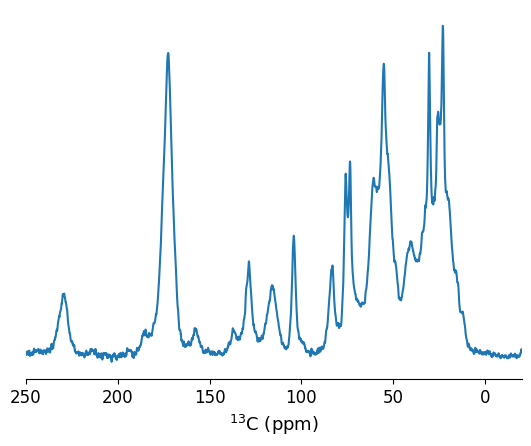

In [2]:
bruker1d(['../../data/1D/8/pdata/1'], xlim=(250, -20))

`SpinPlots` uses Matplotlib's standard style by default. If you want to customize the appearance of your spectra, you can use the option `return_fig=True`. This allows you to return the figure object and modify it as needed before displaying or saving it.

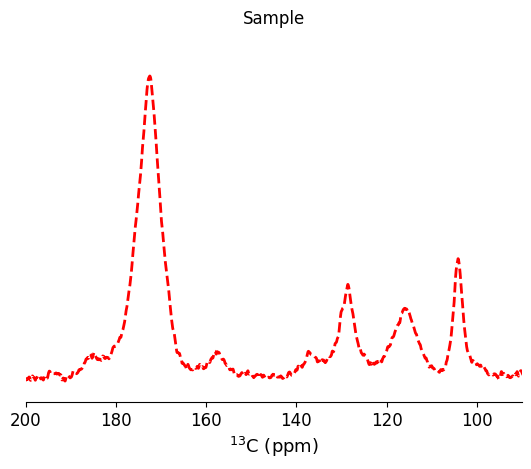

In [3]:
fig, ax = bruker1d(['../../data/1D/8/pdata/1'], return_fig=True)

ax.set_title('Sample')
ax.set_xlim(200, 90)
ax.lines[0].set_color('red')
ax.lines[0].set_linewidth(2)
ax.lines[0].set_linestyle('--')
fig.savefig('../../data/1D/modified.png')

The `bruker1d` function has a bunch of useful features beyond just making a simple plot. Some of the key ones include:

- Plotting several plots together
- Plot with/without frame
- Labelling of spectra
- Normalization of data
- Select colors for each spectrum using [matplotlib's colors](https://matplotlib.org/stable/gallery/color/named_colors.html)
- Saving the plot directly to a file

Here’s an example that highlights most of these features:

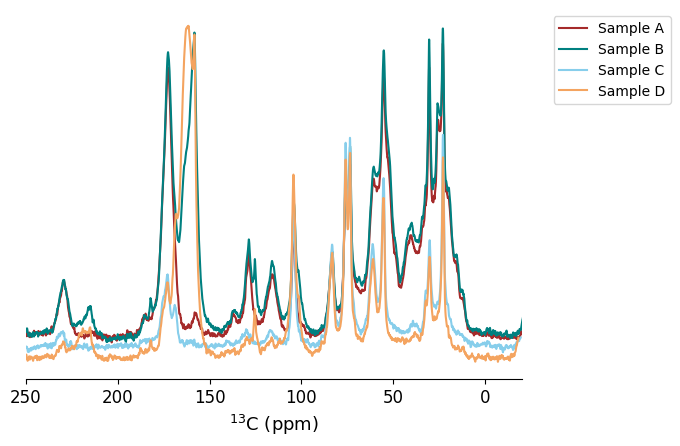

In [4]:
path = '../../data/1D/'
bruker1d([path + '8/pdata/1', path + '12/pdata/1', path + '33/pdata/1', path + '39/pdata/1'],
              labels=['Sample A', 'Sample B', 'Sample C', 'Sample D'],
              color=['brown', 'teal', 'skyblue', 'sandybrown'],
              xlim=(250, -20),
              frame=False,
              normalized=False,
              save=True,
              filename='../../data/1D/overlapped',
              format='png')

### Stacked 1D spectra

You can also opt by stacking the plots, using the `stacked` keyword, as shown below:

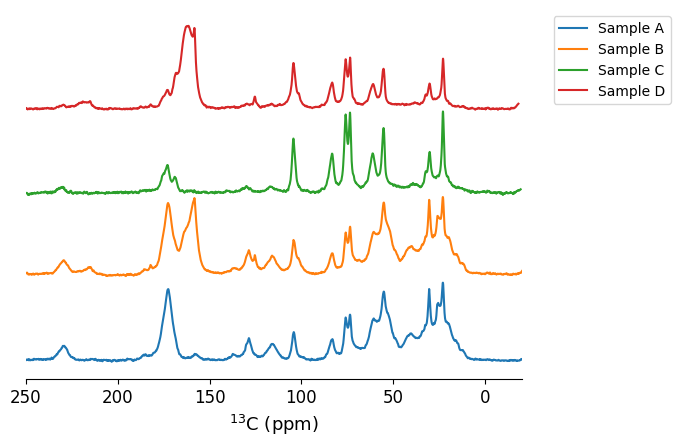

In [5]:
path = '../../data/1D/'
bruker1d([path + '8/pdata/1', path + '12/pdata/1', path + '33/pdata/1', path + '39/pdata/1'],
              labels=['Sample A', 'Sample B', 'Sample C', 'Sample D'],
              xlim=(250, -20),
              frame=False,
              normalized=True,
              stacked=True,
              save=True,
              filename='../../data/1D/stacked',
              format='png')

The `bruker1d_grid` function works similarly to `bruker1d`, but instead of overlapping the spectra, it lets you arrange them in a grid (subplots).

Here’s an example of how it works:

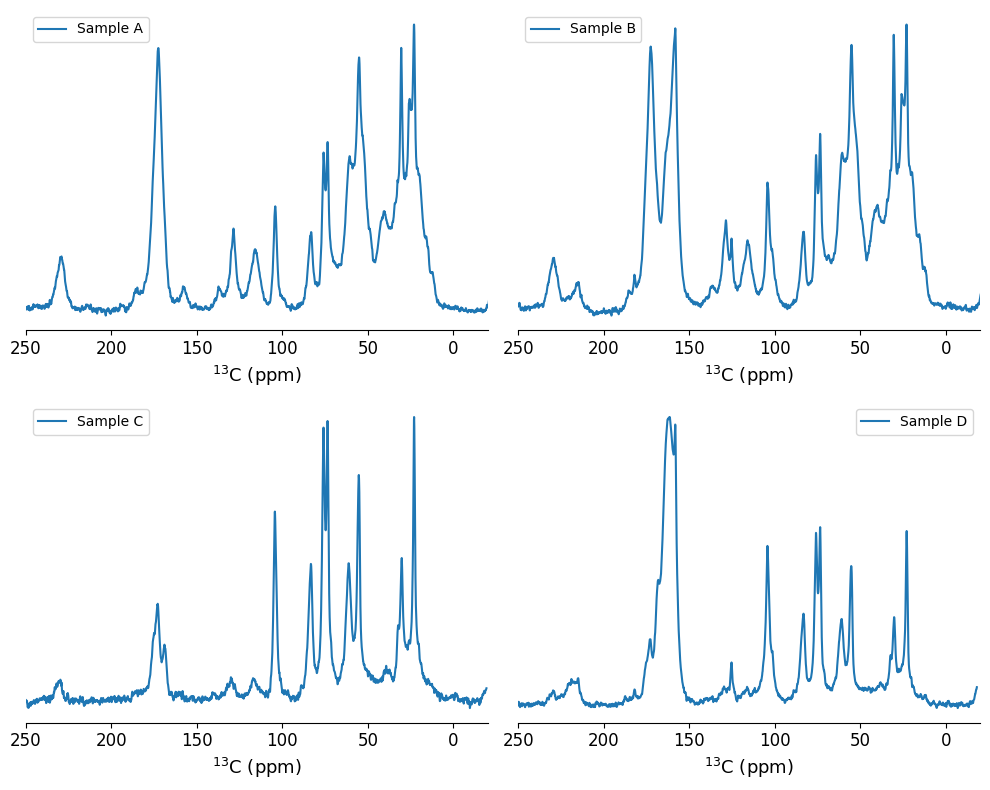

In [6]:
path = '../../data/1D/'
bruker1d_grid([path + '8/pdata/1', path + '12/pdata/1', path + '33/pdata/1', path + '39/pdata/1'],
                labels=['Sample A', 'Sample B', 'Sample C', 'Sample D'],
                xlim=(250, -20),
                subplot_dims=(2, 2),
                frame=False,
                normalized=True,
                save=True,
                filename='../../data/1D/grid',
                format='png')

The spectra can be normalized either by the highest intensity using `normalized='max'` or by the number of scans using `normalized='scans'`. The spectra below compare the `unormalized` and `normalized` version using `scans` and `max`

Text(0.5, 1.0, 'No normalization')

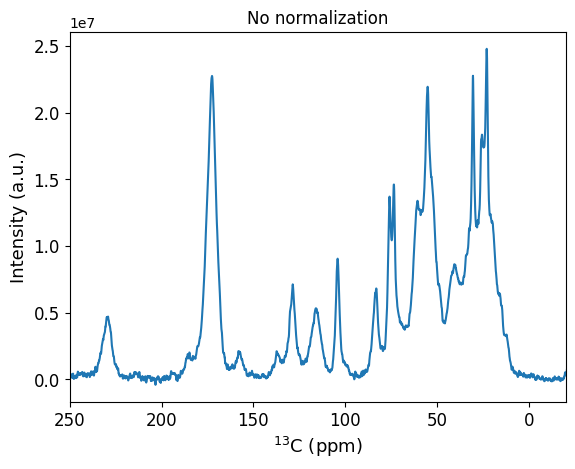

In [17]:
_, ax1 = bruker1d(['../../data/1D/8/pdata/1'], 
                    return_fig=True, 
                    normalized=False, 
                    frame=True,
                    xlim=(250, -20))
ax1.set_title('No normalization')

Text(0.5, 1.0, 'Normalized by number of scans')

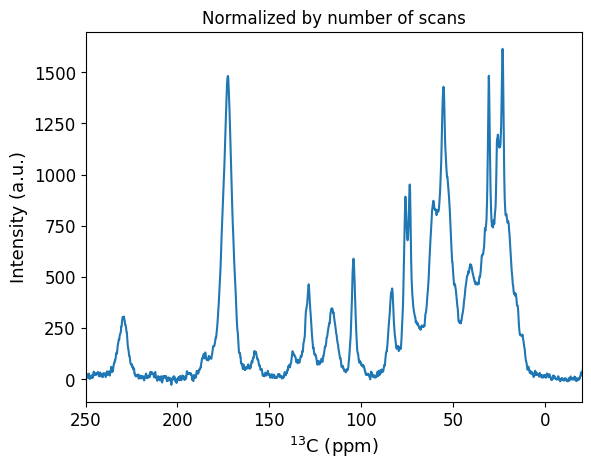

In [21]:
_, ax2 = bruker1d(['../../data/1D/8/pdata/1'], 
                    return_fig=True, 
                    normalized='scans', 
                    frame=True,
                    xlim=(250, -20))
ax2.set_title('Normalized by number of scans')

In [ ]:
_, ax3 = bruker1d(['../../data/1D/8/pdata/1'], 
                    return_fig=True, 
                    normalized='max', 
                    frame=True,
                    xlim=(250, -20))
ax3.set_title('Normalized by maximum value')

## Plot 2D spectra

Lastly, the bruker2d function makes it super easy to plot 2D NMR spectra. You just need to provide a bit more info to customize the plot. Here’s what you can specify:
- `countour_start`: the minimum value for the contour plot
- `countour_num`: how many contour levels you want
- `countour_factor`: the factor between each contour level
- `cmap`: the [matplotlib colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html) for countour (default is 'black')
- `xlim`: limits for the x-axis, i.e. direct dimension (F2)
- `ylim`: limits for the y-axis, i.e. indirect dimension (F1)
- `save`: whether you want to save the plot
- `filename`: the name to save the plot as
- `format`: the file format to save it

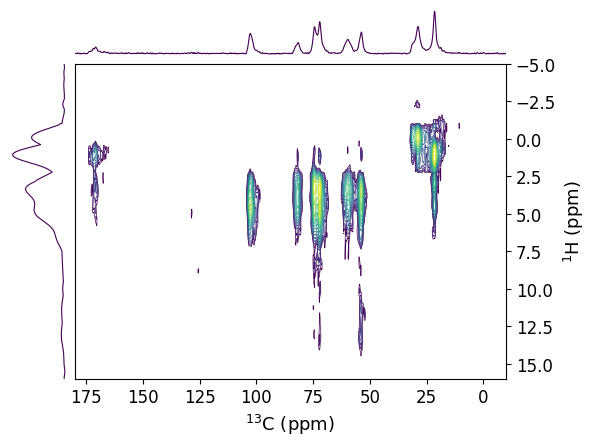

In [9]:
bruker2d('../../data/2D/36/pdata/1',
        contour_start=5e5,
        contour_num=15,
        contour_factor=1.2,
        cmap='viridis',
        xlim=(180, -10),
        ylim=(16, -5),
        save=True,
        filename='../../data/2D/2d_spectrum',
        format='png',)

Some NMR spectra, like double-quantum (DQ) experiments, are often visualized with a diagonal line representing `y=2x`. You can add this diagonal line for any line of the form `y=nx` using the keyword `diag=n`, where `n` sets the desired quantum order. Here’s an example of a <sup>13</sup>C-<sup>13</sup>C DQ-SQ experiment. The option `homo=True` is only needed if the y-axis label isn’t displaying correctly, such as when the DQ-SQ is acquired through CPMAS.

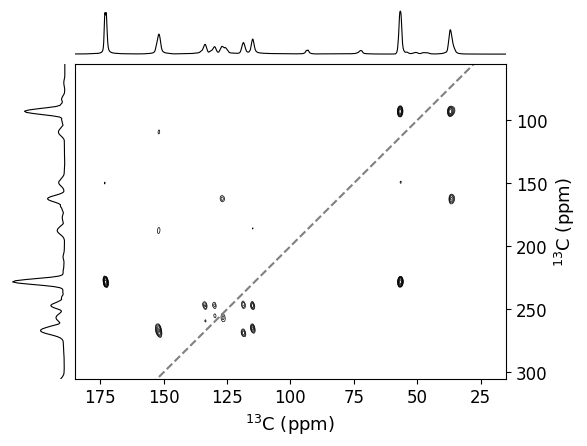

In [ ]:
bruker2d('../../data/2D/16/pdata/1',
        contour_start=7e6,
        contour_num=25,
        contour_factor=1.4,
        xlim=(185, 15),
        ylim=(305, 55),
        diag=2,
        save=True,
        homo=True,
        filename='../../data/2D/dq_sq_spectrum',
        format='png',)